In [9]:
#Importing libraries
import matplotlib.pyplot as plt 
import numpy as np
import cv2 as cv
import math

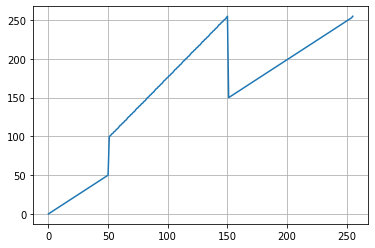

In [10]:
# q1
f1=cv.imread(r'./images/emma_gray.jpg',cv.IMREAD_GRAYSCALE) 
assert f1 is not None

t1=np.linspace(0,50,51)
t2=np.linspace(100,255,100)
t3=np.linspace(150,255,105)

t=np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
fig,ax=plt.subplots()
ax.grid(True)
ax.plot(t)
plt.show()

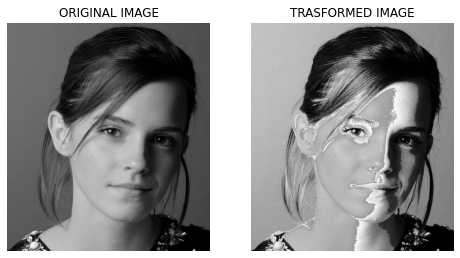

In [11]:
f1_it=cv.LUT(f1,t)

fig, ax =plt.subplots(1,2,figsize=(8,12)) 
ax[0].imshow(f1,cmap='gray',vmin=0,vmax=255)
ax[0].set_title("ORIGINAL IMAGE")

ax[1].imshow(f1_it,cmap='gray',vmin=0,vmax=255)
ax[1].set_title("TRASFORMED IMAGE")
for i in range(2):
    ax[i].axis("off")
plt.show()

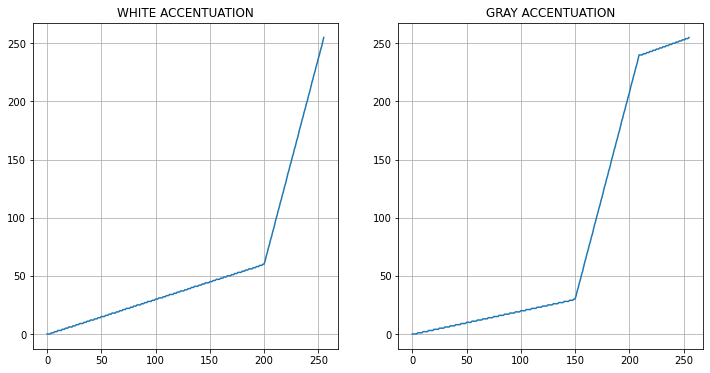

In [12]:
# q2
f2=cv.imread(r'images/brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE) 
assert f2 is not None

# white matter transformation
t_11=np.linspace(0,60,200)
t_12=np.linspace(60,255,56)

t_1=np.concatenate((t_11,t_12),axis=0).astype(np.uint8)

# Gray matter transformation
t_21=np.linspace(0,30,150)
t_22=np.linspace(30,240,60)
t_23=np.linspace(240,255,46)

t_2=np.concatenate((t_21,t_22,t_23),axis=0).astype(np.uint8)

fig, ax =plt.subplots(1,2,figsize=(12,6)) 
ax[0].plot(t_1)
ax[0].set_title("WHITE ACCENTUATION")

ax[1].plot(t_2)
ax[1].set_title("GRAY ACCENTUATION")
for i in range(2):
    ax[i].grid(True)
plt.show()

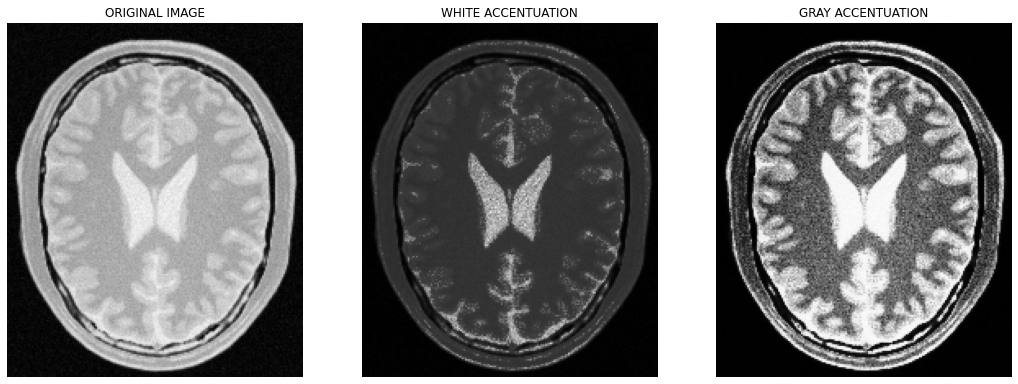

In [13]:
f2_itw=cv.LUT(f2,t_1)
f2_itg=cv.LUT(f2,t_2)

fig, ax =plt.subplots(1,3,figsize=(18,8)) 
ax[0].imshow(f2,cmap='gray',vmin=0,vmax=255)
ax[0].set_title("ORIGINAL IMAGE")

ax[1].imshow(f2_itw,cmap='gray',vmin=0,vmax=255)
ax[1].set_title("WHITE ACCENTUATION")

ax[2].imshow(f2_itg,cmap='gray',vmin=0,vmax=255)
ax[2].set_title("GRAY ACCENTUATION")
for i in range(3):
    ax[i].axis("off")
plt.show()

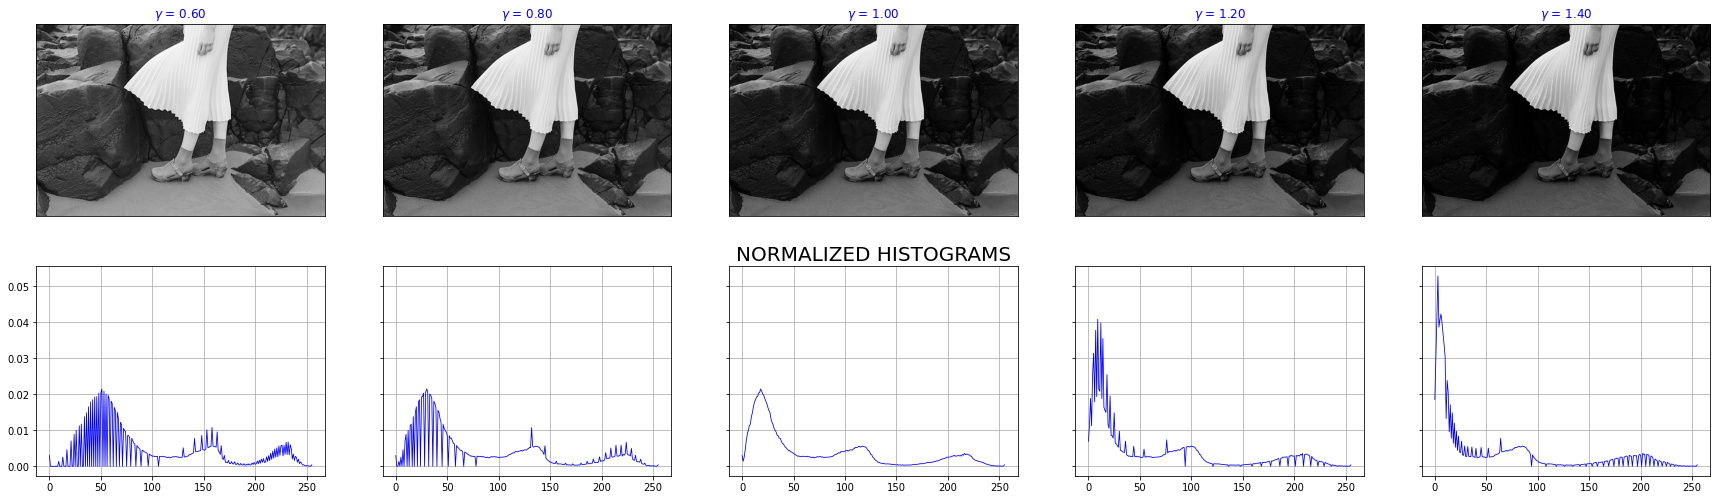

In [14]:
#q3
f3=cv.imread(r'images/highlights_and_shadows.jpg',cv.IMREAD_GRAYSCALE)
assert f3 is not None

gamma_list=[0.6,0.8,1,1.2,1.4]
fig, ax =plt.subplots(2,5,figsize=(30,16),sharey='row') 
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0.2)
ax[1][2].set_title("NORMALIZED HISTOGRAMS",fontsize=20)


for (i,gamma) in enumerate(gamma_list):
    g_t=np.array([((p/255)**gamma)*255 for p in range (0,256)]).astype(np.uint8)
    g_c=cv.LUT(f3,g_t)
    
    ax[0][i%5].imshow(cv.cvtColor(g_c, cv.COLOR_BGR2RGB))
    ax[0][i%5].set_title(r"$\gamma$ = %0.2f"%gamma,color='blue')

    ax[0][i%5].set_xticks([])
    ax[0][i%5].set_yticks([])

    hist_g=cv.calcHist([g_c],[0],None,[256],[0,256])
    ax[1][i%5].plot(hist_g/np.sum(hist_g),color='blue',linewidth=0.8)
    ax[1][i%5].grid(True)


plt.show()

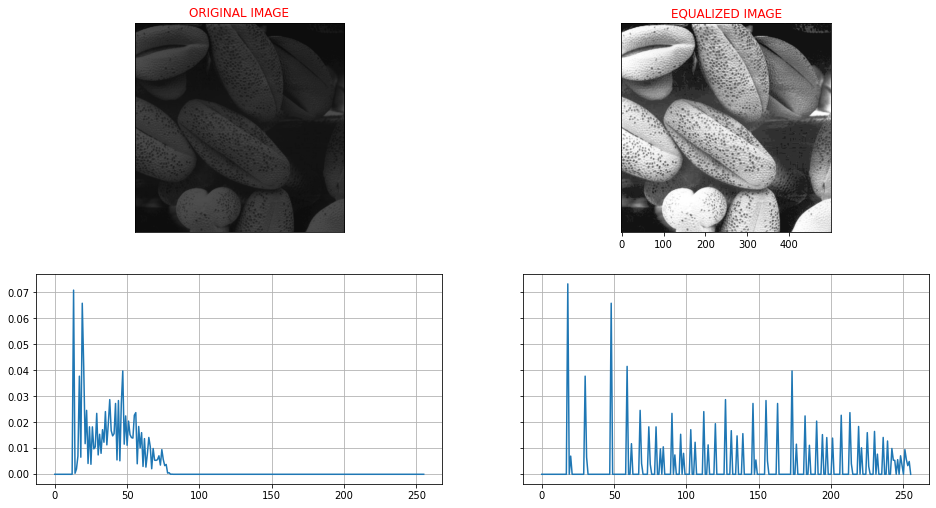

In [15]:
#q4
f4=cv.imread(r'images/shells.png',cv.IMREAD_GRAYSCALE)
assert f4 is not None

hist_f4=cv.calcHist([f4],[0],None,[256],[0,256])
pdf=hist_f4/np.sum(hist_f4)
cdf=np.cumsum(pdf)

t_equalization=255*cdf
f4_equalized=cv.LUT(f4,t_equalization)
hist_equalized=cv.calcHist([f4_equalized],[0],None,[256],[0,256])
pdf_equalized=hist_equalized/np.sum(hist_equalized)

fig, ax =plt.subplots(2,2,figsize=(16,16),sharey='row') 
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0.2)

ax[0][0].imshow(f4,cmap='gray',vmin=0,vmax=255)
ax[0][0].set_title("ORIGINAL IMAGE",color="red")
ax[0][0].set_xticks([])

ax[0][1].imshow(f4_equalized,cmap='gray',vmin=0,vmax=255)
ax[0][1].set_title("EQUALIZED IMAGE",color="red")
ax[0][1].set_yticks([])

ax[1][0].plot(pdf)
ax[1][0].grid(True)

ax[1][1].plot(pdf_equalized)
ax[1][1].grid(True)

plt.show()



In [16]:
def zoom(image, scaling_factor, method):
    img = image
    sf = scaling_factor

    # DETERMINING DIAMENSIONS AND GENERATING AN EMPTY VERTOR TO STORE ZOOMED IMAGE
    if len(img.shape) == 2: 
        zoomedImgDims = [int(dim*sf) for dim in img.shape]
    else:  
        zoomedImgDims = [int(dim*sf) for dim in img.shape]
        zoomedImgDims[2] = 3
    # declaring an empty array to store values
    zoomedImg = np.zeros(zoomedImgDims, dtype=img.dtype)

# -------------------------  NEAREST NEIGHBOUR   ---------------------------------#
    if method == 'NN':
        for row in range(zoomedImg.shape[0]):
            source_row = min(round(row/sf), img.shape[0]-1)
            for column in range(zoomedImg.shape[1]):
                source_column = min(round(column/sf), img.shape[1]-1)

                #FOR GRAY IMAGE
                if len(img.shape) == 2:
                    zoomedImg[row][column] = img[source_row][source_column]
                
                #FOR COLOR IMAGE
                else:
                    for channel in range(3):
                        zoomedImg[row][column][channel] = \
                            img[source_row][source_column][channel]
# -------------------------BILINEAR INTERPOLATION---------------------------------#
    if method == 'BI':
        for row in range(zoomedImg.shape[0]):
            row_position = row/sf
            row_below = math.floor(row_position)
            row_up = min(math.ceil(row_position),img.shape[0]-1)
            for column in range(zoomedImg.shape[1]):
                column_position = column/sf
                column_previous = math.floor(column_position)
                column_next = min(math.ceil(column_position),img.shape[1]-1)
                delta_row = row_position - row_below
                delta_column = column_position - column_previous

                #FOR GRAY IMAGE
                if len(img.shape) == 2:  
                    interVal1 = img[row_below][column_previous]*(1-delta_row)\
                        + img[row_up][column_previous]*(delta_row)
                    interVal2 = img[row_below][column_next]*(1-delta_row)\
                        + img[row_up][column_next]*(delta_row)
                    zoomedImg[row][column] = (interVal1*(1-delta_column)
                                              + interVal2*(delta_column)).astype('uint8')
                #FOR COLOR IMAGE
                else:  
                    for channel in range(3):
                        interVal1 = img[row_below][column_previous][channel]*(1-delta_row)\
                            + img[row_up][column_previous][channel]*(delta_row)
                        interVal2 = img[row_below][column_next][channel]*(1-delta_row)\
                            + img[row_up][column_next][channel]*(delta_row)
                        zoomedImg[row][column][channel] = (interVal1*(1-delta_column)
                                                           + interVal2*(delta_column)).astype('uint8')
    return zoomedImg


In [17]:
#q5
f5_1s=cv.imread(r'images/im01small.png')
assert f5_1s is not None

f5_1=cv.imread(r'images/im01.png')
assert f5_1 is not None

f5_2s=cv.imread(r'images/im02small.png')
assert f5_2s is not None

f5_2=cv.imread(r'images/im02.png')
assert f5_2 is not None

f5_3s=cv.imread(r'images/im03small.png')
assert f5_3s is not None

f5_3=cv.imread(r'images/im03.png')
assert f5_3 is not None

In [18]:
#zooming images by the scale factor 4
zoom_im1_nn=zoom(f5_1s,4,"NN")
zoom_im2_nn=zoom(f5_2s,4,"NN")
zoom_im3_nn=zoom(f5_3s,4,"NN")

zoom_im1_bi=zoom(f5_1s,4,"BI")
zoom_im2_bi=zoom(f5_2s,4,"BI")
zoom_im3_bi=zoom(f5_3s,4,"BI")

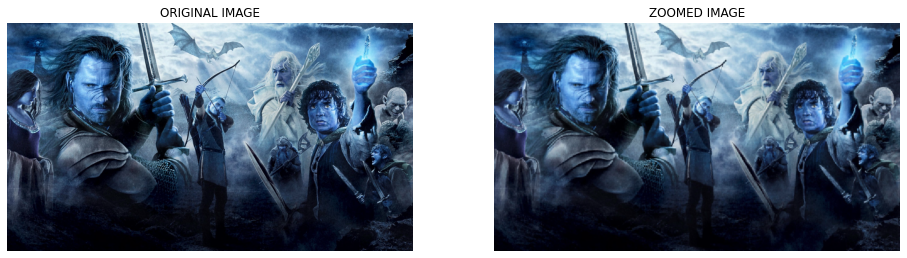

In [ ]:
fig, ax =plt.subplots(1,3,figsize=(16,20)) 
ax[0].imshow(f5_1,cmap='gray',vmin=0,vmax=255)
ax[0].set_title("ORIGINAL IMAGE")

ax[1].imshow(zoom_im1_nn,cmap='gray',vmin=0,vmax=255)
ax[1].set_title("ZOOMED IMAGE")
for i in range(2):
    ax[i].axis("off")
plt.show()